#### PROBLEMA X ALGORITMO
##### Prever o preço de uma ação/imóvel = REGRESSÃO LINEAR: 01 Variável Dependente e 1/n Independente
##### Segmentar cliente em grupo - KMEANS - clusters (Distancia entre os pontos, grupos com as mesmas caracteristicas)
##### Previsão de Risco em Seguradora - REGRESSÃO LOGÍSTICA (Classificação Binária)
##### Detecção de fraude de cartão de crédito - 
#####     ADABOSTER (Combina vários classificadores de resultado fracos em resultados fortes)
##### RANDOM FORREST (combinação de árvore de decisão - média dos resultados)
##### Probabilidade de um cliente comprar um produto - 
#####     REDE NEURAL (Sistema de computação com nós interconectados, reconhecer padrões, aprender e melhorar continuamente)
##### REDE NEURAL RECORRENTE (Reconhecer padrões - usado em corretores e traduções)

## Evaluation
Meta 01: 95% de precisão em prever se um paciente tem ou não uma doença cardiaca

## 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('heart_cleveland.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


<Axes: xlabel='condition'>

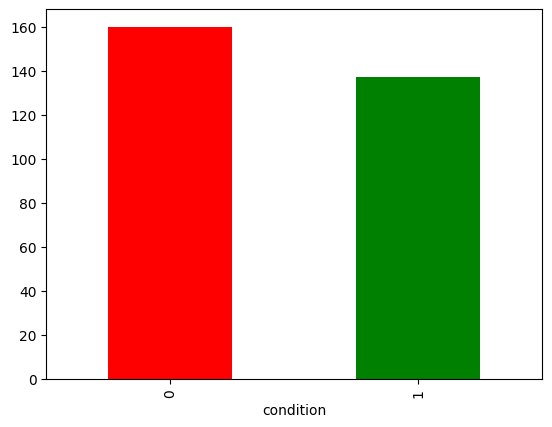

In [37]:
# EDA

# df['condition'].value_counts()
# df['condition'].value_counts(normalize=True)*100
df['condition'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])


In [38]:
# Dados ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


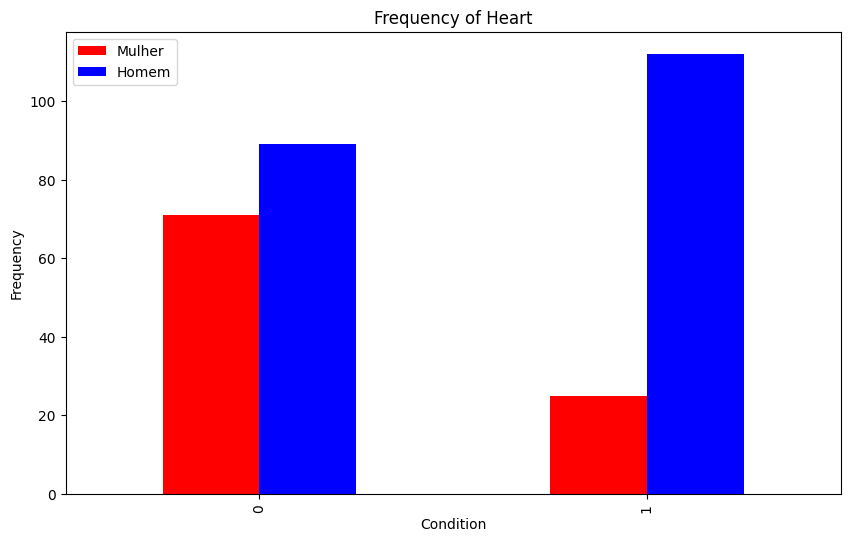

In [39]:
# pd.crosstab(df['condition'], df['sex'])
pd.crosstab(df['condition'], df['sex']).plot(kind='bar', color=['red', 'blue'], figsize=(10, 6))
plt.title('Frequency of Heart')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.legend(['Mulher', 'Homem'])

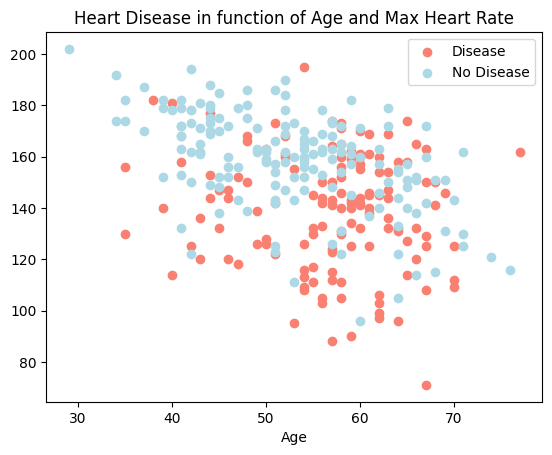

In [40]:
plt.Figure(figsize=(10, 6))

# Plotar valores positivos
plt.scatter(df['age'][df['condition'] == 1], 
            df['thalach'][df['condition'] == 1], c='salmon')

# Plotar valores Negativos
plt.scatter(df['age'][df['condition'] == 0], 
            df['thalach'][df['condition'] == 0], c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.legend(['Disease', 'No Disease'])

<Axes: >

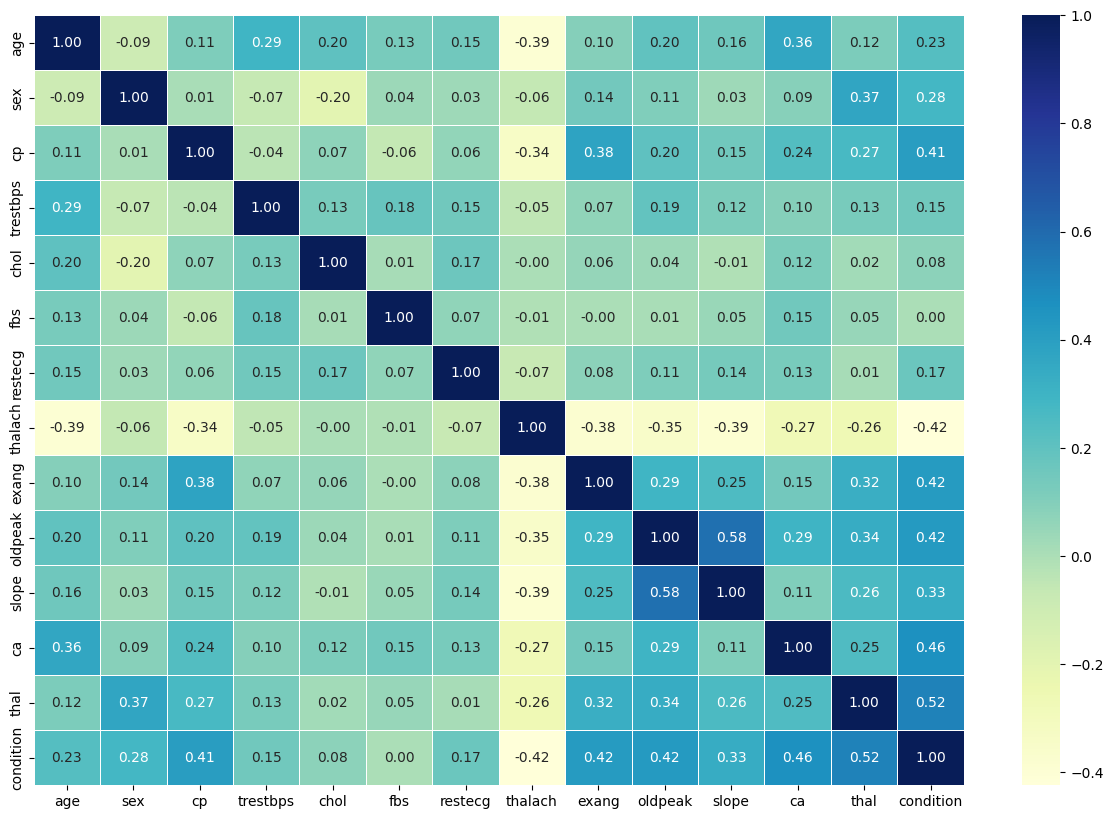

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

In [42]:
# MODELAGEM
X = df.drop('condition', axis=1)
y = df['condition']


In [43]:
# TREINO E TESTE
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Qual modelo usar? 
# https://scikit-learn.org/1.3/tutorial/machine_learning_map/


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {'KNN': KNeighborsClassifier(), 
          'Logistic Regression': LogisticRegression(), 
          'Random Forest': RandomForestClassifier()
          }
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [46]:
fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\bruno.santos\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6333333333333333,
 'Logistic Regression': 0.8,
 'Random Forest': 0.7666666666666667}

### Ajuste de Hiparâmetro e Validação Cruzada

In [47]:
# Hiperparametro = fogo e comida
# K-fold : Embaralhamento dos dados

train_scores = []
test_scores = []

# KNN
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [48]:
train_scores


[1.0,
 0.8016877637130801,
 0.7848101265822784,
 0.7805907172995781,
 0.7890295358649789,
 0.7510548523206751,
 0.7341772151898734,
 0.7341772151898734,
 0.7468354430379747,
 0.7426160337552743,
 0.7510548523206751,
 0.7257383966244726,
 0.729957805907173,
 0.7215189873417721,
 0.7383966244725738,
 0.7172995780590717,
 0.729957805907173,
 0.7257383966244726,
 0.7257383966244726,
 0.7341772151898734]

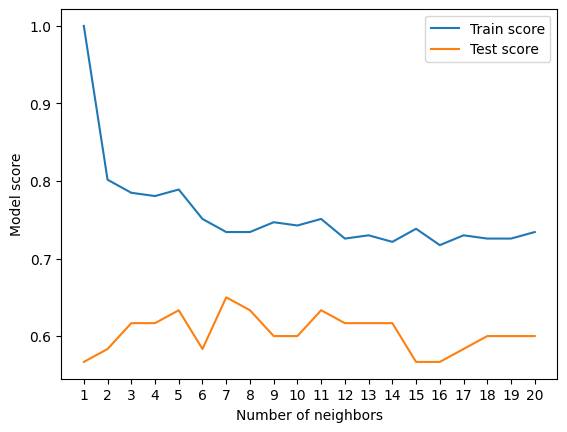

In [49]:
# train_scores
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

### No gráfico neighbor = 11, provavelmente apresenta o melhor resultado

In [50]:
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data: 65.00%


#### Modelo KNN não atingiu melhora no resultado, então ele será descartado

#### ANÁLISE DE HIPERPARÂMETRO - RANDOMIZEDSEARCHCV

In [51]:
# AVALIAÇÃO DO MODELO
# LOGISTIC REGRESSION
logreg_grid = {
                'C': np.logspace(-4, 4, 20), # 20 valores entre 10^-4 e 10^4
               'solver': ['liblinear'] # Algoritmo para otimizar a regularização
               }
# RANDOM FOREST
rf_grid = {
            'n_estimators': np.arange(10, 1000, 50), # 10 a 1000 com passo de 50
            'max_depth': [None, 3, 5, 10], # None, 3, 5, 10
            'min_samples_split': np.arange(2, 20, 2), # 2 a 20 com passo de 2
            'min_samples_leaf': np.arange(1, 20, 2) # 1 a 20 com passo de 2
            }

In [52]:
from sklearn.model_selection import RandomizedSearchCV


In [53]:
# LOGISTIC REGRESSION
rscv_log_reg = RandomizedSearchCV(LogisticRegression(),
                                    param_distributions=logreg_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)
rscv_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rscv_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [55]:
rscv_log_reg_score = rscv_log_reg.score(X_test, y_test)

#### O melhor parâmetro para Regressão Logística é de c= 0.615, onde aumentou a performance do modelo em 3,33%

In [56]:
# RANDOM FOREST
# LOGISTIC REGRESSION
rscv_rf = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions=rf_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rscv_rf.best_params_

{'n_estimators': np.int64(160),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(7),
 'max_depth': None}

In [58]:
print(f"O melhor parâmetro para o modelo de Random Forest é: {rscv_rf.best_params_}")

O melhor parâmetro para o modelo de Random Forest é: {'n_estimators': np.int64(160), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(7), 'max_depth': None}


In [62]:
rscv_rf_score = rscv_rf.score(X_test, y_test)
rscv_rf_score

0.7833333333333333

In [64]:
print(f"O score do modelo de Logistic Regression: {rscv_log_reg_score} e do modelo de Random Forest: {rscv_rf_score} de randommizecv")

O score do modelo de Logistic Regression: 0.8 e do modelo de Random Forest: 0.7833333333333333 de randommizecv


#### ANÁLISE DE HIPERPARÂMETRO - GRIDSEARCHCV

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                            param_grid=logreg_grid,
                            cv=5,
                            verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [69]:
gs_log_reg.score(X_test, y_test)

0.8

#### Avaliar o modelo

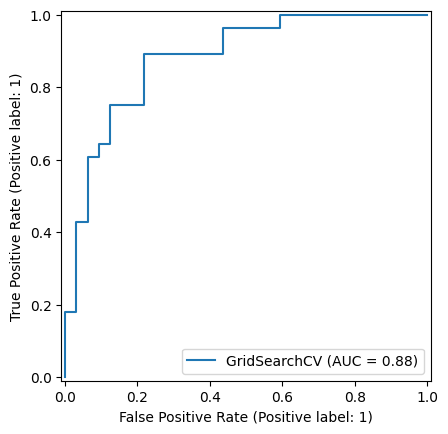

In [79]:
# Verificar falsos positivos e falsos negativos
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [80]:
from sklearn.metrics import confusion_matrix
y_preds = gs_log_reg.predict(X_test)
print(confusion_matrix(y_test, y_preds))

[[28  4]
 [ 8 20]]


Text(8.222222222222223, 0.5, 'Predicted label')

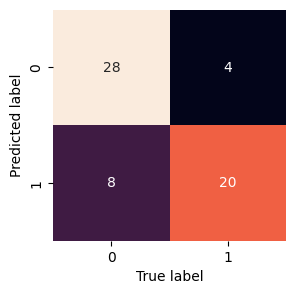

In [82]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')


#### RELATÓRIO DE CLASSIFICAÇÃO

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



In [30]:
df.to_csv('heart_cleaned.csv', index=False)